In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

# Reading DataSet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.layers import *
from keras.models import Sequential

# Splitting DataSet

In [ ]:
class_names = os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images')
print(f"Class names: {class_names}")

Class names: ['Uninfected', 'Parasitized']


In [ ]:
generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

In [ ]:
train_data = generator.flow_from_directory(directory = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                          target_size = (240,240),
                                          color_mode = 'rgb',
                                          batch_size = 50,
                                          class_mode = 'categorical',
                                          shuffle = True,
                                          subset = 'training')

Found 22048 images belonging to 2 classes.


In [ ]:
val_data = generator.flow_from_directory(directory = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                               target_size = (240,240),
                                                color_mode = 'rgb',
                                                batch_size = 50,
                                                class_mode = 'categorical',
                                                shuffle = True,
                                                subset = 'validation')

Found 5510 images belonging to 2 classes.


# Visualization

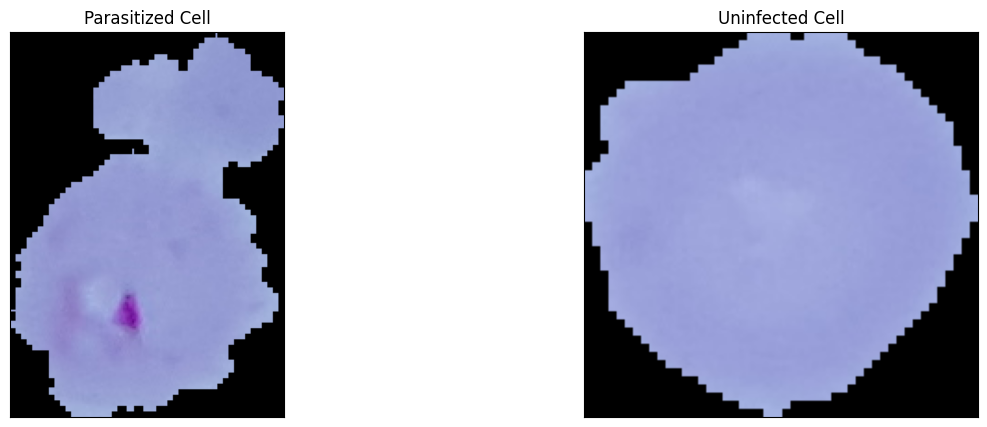

In [ ]:

import cv2

plt.figure(1, figsize = (15 , 5))
plt.subplot(1, 2 , 1)
plt.imshow(cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'))
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1, 2 , 2)
plt.imshow(cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png'))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

# Multi-Layer Perceptron

In [ ]:
# Model Build
mlp_model = Sequential()

# inputLayer --> hiddenLayer --> Hidden Layer --> Output Layer

mlp_model.add(Flatten(input_shape = (240,240,3)))

mlp_model.add(Dense(128, activation = 'relu'))

mlp_model.add(Dense(32, activation = 'relu'))

mlp_model.add(Dense(2, activation = 'softmax'))


In [ ]:
mlp_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 172800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │    22,118,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,122,722 (84.39 MB)

 Trainable params: 22,122,722 (84.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mlp_model.compile(optimizer ='adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
model_history = mlp_model.fit(train_data,
                              epochs = 4,
                             validation_data = val_data)

Epoch 1/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 159s 354ms/step - accuracy: 0.5584 - loss: 8.3269 - val_accuracy: 0.5846 - val_loss: 1.2865
Epoch 2/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 200s 351ms/step - accuracy: 0.5957 - loss: 1.4533 - val_accuracy: 0.5984 - val_loss: 0.7974
Epoch 3/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 152s 342ms/step - accuracy: 0.6383 - loss: 0.7791 - val_accuracy: 0.5314 - val_loss: 0.9207
Epoch 4/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 153s 345ms/step - accuracy: 0.6529 - loss: 0.6917 - val_accuracy: 0.6568 - val_loss: 0.6312


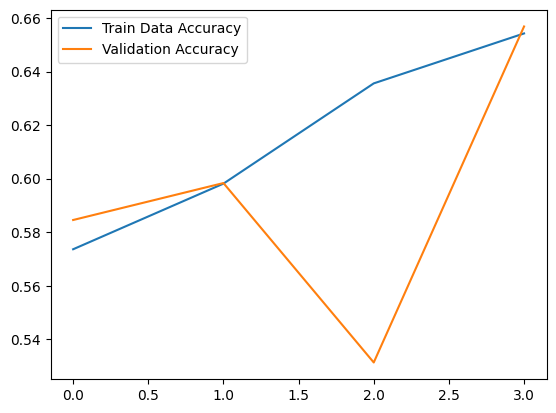

In [ ]:
#Plotting
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
mlp_model.evaluate(val_data)

111/111 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.6584 - loss: 0.6332


[0.631151020526886, 0.6568058133125305]

# CNN Model

In [ ]:
# Build CNN Model
cnn_model = Sequential()

# Conv layer with input
cnn_model.add(Conv2D(filters = 16, kernel_size = 3, padding ='same',
                    activation ='relu', input_shape = [240, 240,3]))

# add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# adding Conv layer
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,
                    padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# adding Conv layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3,
                    padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Flatten layer to convert from 3D to 1D
cnn_model.add(Flatten())

# Adding FullyConnectedLayer
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

# Adding Outputlayer
cnn_model.add(Dense(2, activation = 'softmax'))


In [ ]:
cnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,770 (2.15 MB)

 Trainable params: 564,770 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer ='adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
model_history = cnn_model.fit(train_data,
                              epochs = 4,
                             validation_data = val_data)

Epoch 1/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 427s 962ms/step - accuracy: 0.7581 - loss: 0.4608 - val_accuracy: 0.9441 - val_loss: 0.1679
Epoch 2/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 423s 957ms/step - accuracy: 0.9561 - loss: 0.1393 - val_accuracy: 0.9434 - val_loss: 0.1527
Epoch 3/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 441s 955ms/step - accuracy: 0.9593 - loss: 0.1237 - val_accuracy: 0.9468 - val_loss: 0.1548
Epoch 4/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 420s 951ms/step - accuracy: 0.9639 - loss: 0.1111 - val_accuracy: 0.9466 - val_loss: 0.1575


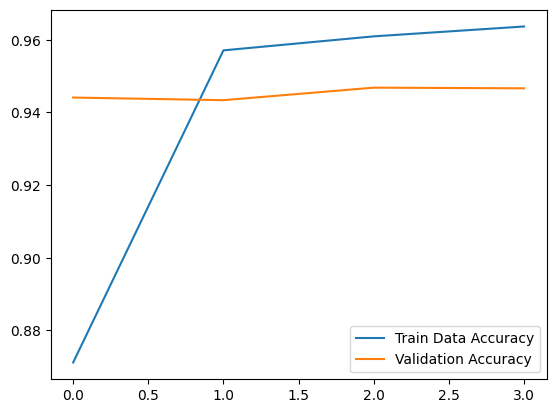

In [ ]:
#Plotting
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluating DataSet
cnn_model.evaluate(val_data)

111/111 ━━━━━━━━━━━━━━━━━━━━ 37s 329ms/step - accuracy: 0.9429 - loss: 0.1624


[0.15751415491104126, 0.9466424584388733]

# Regularization

In [ ]:
from tensorflow.keras.regularizers import l1

# Enhancing CNN Model

cnn_model = Sequential()

# Conv layer with input
cnn_model.add(Conv2D(filters = 16, kernel_size = 3, padding ='same', kernel_regularizer = l1,
                    activation ='relu', input_shape = [240, 240,3]))

# add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# adding Conv layer
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,
                    padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# adding Conv layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3,
                    padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Flatten layer to convert from 3D to 1D
cnn_model.add(Flatten())

# Adding FullyConnectedLayer
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

# Adding Outputlayer
cnn_model.add(Dense(2, activation = 'softmax'))


In [ ]:
cnn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,770 (2.15 MB)

 Trainable params: 564,770 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer ='adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
model_history = cnn_model.fit(train_data,
                              epochs = 4,
                             validation_data = val_data)

Epoch 1/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 431s 969ms/step - accuracy: 0.7275 - loss: 0.7291 - val_accuracy: 0.9421 - val_loss: 0.2685
Epoch 2/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 438s 962ms/step - accuracy: 0.9546 - loss: 0.2358 - val_accuracy: 0.9452 - val_loss: 0.2148
Epoch 3/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 424s 958ms/step - accuracy: 0.9627 - loss: 0.1739 - val_accuracy: 0.9408 - val_loss: 0.2149
Epoch 4/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 422s 954ms/step - accuracy: 0.9633 - loss: 0.1514 - val_accuracy: 0.9472 - val_loss: 0.1805


In [ ]:
# Evaluating DataSet
cnn_model.evaluate(val_data)

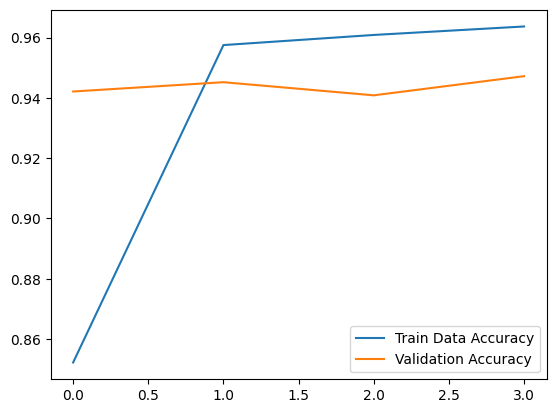

In [ ]:
#Plotting
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

# Search Best Parameters

In [ ]:
params_grid = {
    'num_filters' : [32, 64, 128],
    'filter_size' : [2, 3],
    'drop_out' : [0.2, 0.5],
}

In [ ]:
import itertools
keys, values = zip(*params_grid.items())
combination = [dict(zip(keys, val)) for val in itertools.product(*values)]

In [ ]:
# List Combinations values
combination

[{'num_filters': 32, 'filter_size': 2, 'drop_out': 0.2},
 {'num_filters': 32, 'filter_size': 2, 'drop_out': 0.5},
 {'num_filters': 32, 'filter_size': 3, 'drop_out': 0.2},
 {'num_filters': 32, 'filter_size': 3, 'drop_out': 0.5},
 {'num_filters': 64, 'filter_size': 2, 'drop_out': 0.2},
 {'num_filters': 64, 'filter_size': 2, 'drop_out': 0.5},
 {'num_filters': 64, 'filter_size': 3, 'drop_out': 0.2},
 {'num_filters': 64, 'filter_size': 3, 'drop_out': 0.5},
 {'num_filters': 128, 'filter_size': 2, 'drop_out': 0.2},
 {'num_filters': 128, 'filter_size': 2, 'drop_out': 0.5},
 {'num_filters': 128, 'filter_size': 3, 'drop_out': 0.2},
 {'num_filters': 128, 'filter_size': 3, 'drop_out': 0.5}]

In [ ]:
for params in combination:

    model = Sequential()
    model.add(Conv2D(32,(params['filter_size'],params['filter_size']),
                     activation = 'relu', input_shape = (240, 240, 3)))

    model.add(MaxPooling2D(pool_size = (3,3)))
    model.add(Conv2D(64, (params['filter_size'],params['filter_size']), activation = 'relu'))

    model.add(MaxPooling2D(pool_size = (3,3)))
    model.add(Dropout(params['drop_out']))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(params['drop_out']))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    # Compile
    model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

    # fit
    model.fit(train_data, epochs = 4, validation_data = val_data)

    #
    print("Params" , params)



Epoch 1/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.6776 - loss: 0.6079 - val_accuracy: 0.9196 - val_loss: 0.2484
Epoch 2/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.9383 - loss: 0.1932 - val_accuracy: 0.9381 - val_loss: 0.1759
Epoch 3/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - accuracy: 0.9532 - loss: 0.1480 - val_accuracy: 0.9334 - val_loss: 0.2140
Epoch 4/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.9618 - loss: 0.1161 - val_accuracy: 0.9350 - val_loss: 0.2176
Params {'num_filters': 32, 'filter_size': 2, 'drop_out': 0.2}
Epoch 1/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.6767 - loss: 0.5906 - val_accuracy: 0.9309 - val_loss: 0.2830
Epoch 2/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.9268 - loss: 0.2587 - val_accuracy: 0.9370 - val_loss: 0.1957
Epoch 3/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.9482 - loss: 0.1829 - val_accuracy: 0.9397 - val_loss: 0.1915
Epoch 4/4
441/441 ━━━━━━━━━━━━━━━━━━━━ 554

In [ ]:
# Taking too long to run all different permutations,
# The idea is to select the best parameters and train the model on to enhance the performance
print(f'Best Accuracy : {}')
print(f'Best Parameters : {}')

1 - Params {'num_filters': 32, 'filter_size': 2, 'drop_out': 0.2} ---> accuracy: 0.9618 - loss: 0.1161

2-

# Transfer Learning

In [ ]:
from keras.applications.vgg19 import VGG19

vgg19 = VGG19()
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base = VGG19(include_top = False, input_shape =())

In [ ]:
base = VGG19(include_top = False, input_shape = (240, 240, 3))
vgg19_model.add(Dense(2, activation = 'softmax'))

In [ ]:
vgg19_model.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
# Running on 1 epoch because it is taking too long
vgg19_model.fit(train_data, epochs = 1)

139/441 ━━━━━━━━━━━━━━━━━━━━ 5:46:39 69s/step - accuracy: 0.5031 - loss: 0.6939

In [ ]:
vgg19_model.evaluate(test_data)

# Conclusion

1- MLP performed  ---> Accuracy in train and test almost 65%
It is good that performing almost the same in the train and test data but 65% is very low to depend on.

2- CNN ---> Accuracy in training = 96%, on testing 94%. Performing well on both.

3- Regularization with CNN ---> performing the same as CNN without Regularization.

4- Best Hyperparameters values with CNN ---> performed well but took too long to try every permutation

5- Transfer Learning ---> VGG19 ---> applying on 1 epoch as it is taking too long to run